# HumanActivityRecognition

<br>


This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.

This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone. This experiment was video recorded to label the data manually.

## How data was recorded

By using the sensors(Gyroscope and accelerometer) in a smartphone, they have captured '3-axial linear acceleration'(_tAcc-XYZ_) from accelerometer and '3-axial angular velocity' (_tGyro-XYZ_) from Gyroscope with several variations. 

> prefix 't' in those metrics denotes time.

> suffix 'XYZ' represents 3-axial signals in X , Y, and Z directions.

### Feature names

1. These sensor signals are preprocessed by applying noise filters and then sampled in fixed-width windows(sliding windows) of 2.56 seconds each with 50% overlap. ie., each window has 128 readings. 

2. From Each window, a feature vector was obtianed by calculating variables from the time and frequency domain.
> In our dataset, each datapoint represents a window with different readings 
3. The accelertion signal was saperated into Body and Gravity acceleration signals(___tBodyAcc-XYZ___ and ___tGravityAcc-XYZ___) using some low pass filter with corner frequecy of 0.3Hz.

4. After that, the body linear acceleration and angular velocity were derived in time to obtian _jerk signals_ (___tBodyAccJerk-XYZ___ and ___tBodyGyroJerk-XYZ___). 

5. The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names like _tBodyAccMag_, _tGravityAccMag_, _tBodyAccJerkMag_, _tBodyGyroMag_ and _tBodyGyroJerkMag_.

6. Finally, We've got frequency domain signals from some of the available signals by applying a FFT (Fast Fourier Transform). These signals obtained were labeled with ___prefix 'f'___ just like original signals with ___prefix 't'___. These signals are labeled as ___fBodyAcc-XYZ___, ___fBodyGyroMag___ etc.,.

7. These are the signals that we got so far.
	+ tBodyAcc-XYZ
	+ tGravityAcc-XYZ
	+ tBodyAccJerk-XYZ
	+ tBodyGyro-XYZ
	+ tBodyGyroJerk-XYZ
	+ tBodyAccMag
	+ tGravityAccMag
	+ tBodyAccJerkMag
	+ tBodyGyroMag
	+ tBodyGyroJerkMag
	+ fBodyAcc-XYZ
	+ fBodyAccJerk-XYZ
	+ fBodyGyro-XYZ
	+ fBodyAccMag
	+ fBodyAccJerkMag
	+ fBodyGyroMag
	+ fBodyGyroJerkMag

8. We can esitmate some set of variables from the above signals. ie., We will estimate the following properties on each and every signal that we recoreded so far.

	+ ___mean()___: Mean value
	+ ___std()___: Standard deviation
	+ ___mad()___: Median absolute deviation 
	+ ___max()___: Largest value in array
	+ ___min()___: Smallest value in array
	+ ___sma()___: Signal magnitude area
	+ ___energy()___: Energy measure. Sum of the squares divided by the number of values. 
	+ ___iqr()___: Interquartile range 
	+ ___entropy()___: Signal entropy
	+ ___arCoeff()___: Autorregresion coefficients with Burg order equal to 4
	+ ___correlation()___: correlation coefficient between two signals
	+ ___maxInds()___: index of the frequency component with largest magnitude
	+ ___meanFreq()___: Weighted average of the frequency components to obtain a mean frequency
	+ ___skewness()___: skewness of the frequency domain signal 
	+ ___kurtosis()___: kurtosis of the frequency domain signal 
	+ ___bandsEnergy()___: Energy of a frequency interval within the 64 bins of the FFT of each window.
	+ ___angle()___: Angle between to vectors.

9. We can obtain some other vectors by taking the average of signals in a single window sample. These are used on the angle() variable'
`
	+ gravityMean
	+ tBodyAccMean
	+ tBodyAccJerkMean
	+ tBodyGyroMean
	+ tBodyGyroJerkMean


###  Y_Labels(Encoded)
+ In the dataset, Y_labels are represented as numbers from 1 to 6 as their identifiers.

	- WALKING as __1__
	- WALKING_UPSTAIRS as __2__
	- WALKING_DOWNSTAIRS as __3__
	- SITTING as __4__
	- STANDING as __5__
	- LAYING as __6__
    
## Train and test data were saperated
 - The readings from ___70%___ of the volunteers were taken as ___trianing data___ and remaining ___30%___ subjects recordings were taken for ___test data___
 
## Data

* All the data is present in 'UCI_HAR_dataset/' folder in present working directory.
     - Feature names are present in 'UCI_HAR_dataset/features.txt'
     - ___Train Data___
         - 'UCI_HAR_dataset/train/X_train.txt'
         - 'UCI_HAR_dataset/train/subject_train.txt'
         - 'UCI_HAR_dataset/train/y_train.txt'
     - ___Test Data___
         - 'UCI_HAR_dataset/test/X_test.txt'
         - 'UCI_HAR_dataset/test/subject_test.txt'
         - 'UCI_HAR_dataset/test/y_test.txt'
         

## Data Size :
> 27 MB












### Importing Libraries

In [1]:
#Loading libraries
import pandas as pd
import numpy as np
import os
# Importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout
from sklearn.metrics import confusion_matrix

import os
import random
from numpy.random import seed
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Flatten, Dropout
from keras.callbacks import ModelCheckpoint
from keras.utils import plot_model
import keras.backend as K
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



Using TensorFlow backend.


In [2]:
#mounting drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Here we will get indexes of activities whose labels are 4,5,6 to variables and we concatinate them and convert it into list

In [0]:
os.chdir('gdrive/My Drive/Colab Notebooks/data')

### Loading the dataset

In [4]:
# get the features from features.txt file
features = list()
with open('features.txt') as f:
 features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


In [0]:
x_train_path = "X_train.txt"
x_test_path = "X_test.txt"
y_train_path = "y_train.txt"
y_test_path = "y_test.txt"


In [0]:
with open(x_train_path) as x_t:
  lines = x_t.readlines()
final_result = []
for line in lines:
    x1 = line.strip()
    x2 = x1.replace(' ', ' ')# removing inconsistent blank spaces
    x2 = x2.split()
    out = list(map(float,x2))
    final_result.append(out)
x_train = np.array(final_result)
                    
with open(x_test_path) as x_t:
  lines = x_t.readlines()
final_result = []
for line in lines:
    x1 = line.strip()
    x2 = x1.replace(' ', ' ')# removing inconsistent blank spaces
    x2 = x2.split()
    out = list(map(float,x2))
    final_result.append(out)
x_test = np.array(final_result)

with open(y_train_path) as x_t:
  lines = x_t.readlines()
final_result = []
for line in lines:
    x1 = line.strip()
    x2 = int(x1)
    final_result.append(x2)
y_train = np.array(final_result)



with open(y_test_path) as x_t:
  lines = x_t.readlines()
final_result = []
for line in lines:
    x1 = line.strip()
    x2 = int(x1)
    final_result.append(x2)
y_test = np.array(final_result)
 

In [7]:
print("The shape of x_train data is {}".format(x_train.shape))
print("The shape of x_test data is {}".format(x_test.shape))
print("The shape of y_train data is {}".format(y_train.shape))
print("The shape of y_test data is {}".format(y_test.shape))

The shape of x_train data is (7352, 561)
The shape of x_test data is (2947, 561)
The shape of y_train data is (7352,)
The shape of y_test data is (2947,)


# Models

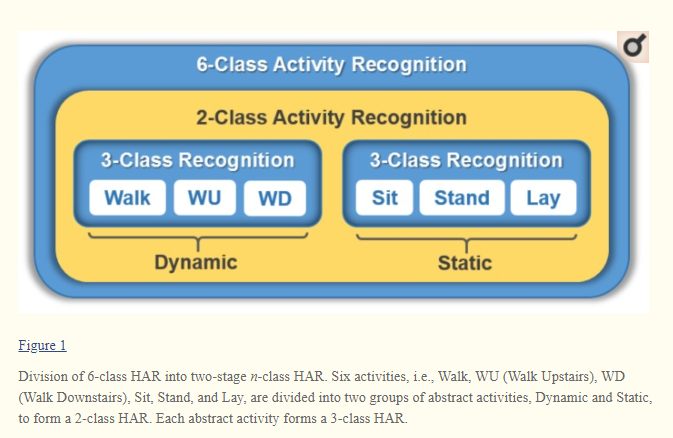

In [0]:
from IPython.display import display, Image
display(Image(filename='pic1.PNG'))


## Processing Static data

In [0]:
st1 = np.where(y_train==4)[0]
st2 = np.where(y_train==5)[0]
st3 = np.where(y_train==6)[0]
st_final = np.concatenate([st1,st2,st3])
static = st_final.tolist()

Now we will shuffle the static list and will grab the same elements from x_train and y_train

In [0]:
import random
rd = random.random()
random.shuffle(static, lambda: rd)
x_train_st = x_train[static]
y_train_st = y_train[static]
# Convert (4, 5, 6) labels to (0, 1, 2)
y_train_st = y_train_st - 4
print("The shape of static x_train data is {}".format(x_train_st.shape))
print("The shape of static  y_train data is {}".format(y_train_st.shape))

The shape of static x_train data is (4067, 561)
The shape of static  y_train data is (4067,)


In [0]:
# similar for test data
st1 = np.where(y_test==4)[0]
st2 = np.where(y_test==5)[0]
st3 = np.where(y_test==6)[0]
st_final = np.concatenate([st1,st2,st3])
static = st_final.tolist()
random.shuffle(static, lambda: rd)
x_test_st = x_test[static]
y_test_st = y_test[static]
# Convert (4, 5, 6) labels to (0, 1, 2)
y_test_st = y_test_st - 4
print("The shape of static x_test data is {}".format(x_test_st.shape))
print("The shape of static  y_test data is {}".format(y_test_st.shape))


The shape of static x_test data is (1560, 561)
The shape of static  y_test data is (1560,)


In [0]:
classes = 3
# Convert to one hot encoding vector
y_train_st_onehot = np.eye(classes)[y_train_st]


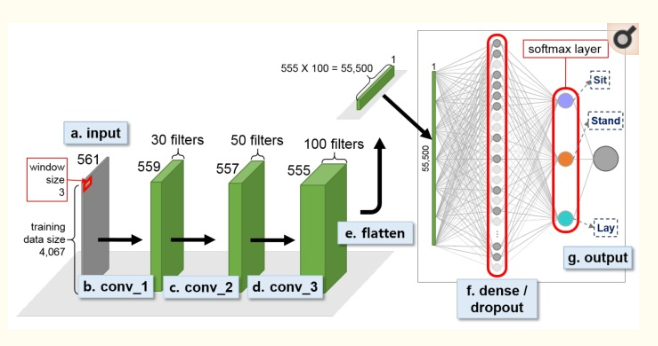

In [0]:
from IPython.display import display, Image
display(Image(filename='pic2.PNG'))


In [0]:
# Fit 1d CNN for static HAR
seed(2017)
model = Sequential()
model.add(Conv1D(30, 3, input_shape=(561, 1), activation='relu'))
model.add(Conv1D(50, 3, activation='relu'))
model.add(Conv1D(100, 3, activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.add(Dropout(0.50))
adam = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='mean_squared_error', optimizer=adam, metrics=['accuracy'])
# Summarize layers
print(model.summary())

W0721 15:11:19.946520 139692053485440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0721 15:11:19.999512 139692053485440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0721 15:11:20.011261 139692053485440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0721 15:11:20.141397 139692053485440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0721 15:11:20.152779 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 559, 30)           120       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 557, 50)           4550      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 555, 100)          15100     
_________________________________________________________________
flatten_1 (Flatten)          (None, 55500)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 166503    
_________________________________________________________________
dropout_1 (Dropout)          (None, 3)                 0         
Total params: 186,273
Trainable params: 186,273
Non-trainable params: 0
_________________________________________________________________
None

In [0]:
# refarance  https://github.com/heeryoncho/sensors2018cnnhar/blob/master/har/har_stat_learn_model.py

#if not os.path.exists('har_stat.png'):
#    model_file = 'har_stat.png'
#    plot_model(model, to_file=model_file)

new_dir = 'models/'
if not os.path.exists(new_dir):
    os.makedirs(new_dir)
filepath = new_dir + 'weights.{epoch:02d}-{val_acc:.2f}.hdf5'

callbk = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto', period=1)

In [0]:
history = model.fit(np.expand_dims(x_train_st, axis=2), y_train_st_onehot,
          batch_size=32, epochs=100, verbose=2, validation_split=0.2, callbacks=[callbk])

W0721 15:11:30.072222 139692053485440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 3253 samples, validate on 814 samples
Epoch 1/100
 - 11s - loss: 0.3110 - acc: 0.4218 - val_loss: 0.1193 - val_acc: 0.9681

Epoch 00001: val_loss improved from inf to 0.11925, saving model to models/weights.01-0.97.hdf5
Epoch 2/100
 - 10s - loss: 0.2667 - acc: 0.4931 - val_loss: 0.0734 - val_acc: 0.9398

Epoch 00002: val_loss improved from 0.11925 to 0.07335, saving model to models/weights.02-0.94.hdf5
Epoch 3/100
 - 10s - loss: 0.2514 - acc: 0.5177 - val_loss: 0.0610 - val_acc: 0.9767

Epoch 00003: val_loss improved from 0.07335 to 0.06096, saving model to models/weights.03-0.98.hdf5
Epoch 4/100
 - 10s - loss: 0.2481 - acc: 0.5272 - val_loss: 0.0910 - val_acc: 0.9214

Epoch 00004: val_loss did not improve from 0.06096
Epoch 5/100
 - 10s - loss: 0.2426 - acc: 0.5281 - val_loss: 0.0580 - val_acc: 0.9951

Epoch 00005: val_loss improved from 0.06096 to 0.05796, saving model to models/weights.05-1.00.hdf5
Epoch 6/100
 - 10s - loss: 0.2419 - acc: 0.5278 - val_loss: 0.0507 - val_acc

Train_Accuracy 0.9975411851487583


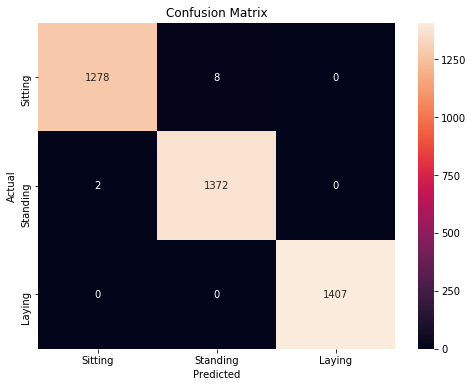

Test_Accuracy 0.9628205128205128


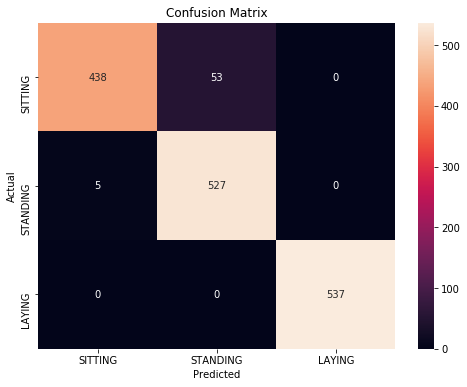

In [0]:
pred_ = model.predict(np.expand_dims(x_train_st, axis=2), batch_size=32)
print("Train_Accuracy",accuracy_score(y_train_st, np.argmax(pred_, axis=1)))
conf_matrix = confusion_matrix(y_train_st ,np.argmax(pred_, axis=1))
class_label = ['Sitting','Standing','Laying']
conf_matrix = pd.DataFrame(conf_matrix, index=class_label, columns=class_label)
fig = plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
#################
pred_ = model.predict(np.expand_dims(x_test_st, axis=2), batch_size=32)
print("Test_Accuracy",accuracy_score(y_test_st, np.argmax(pred_, axis=1)))
conf_matrix = confusion_matrix(y_test_st ,np.argmax(pred_, axis=1))
class_label = ['SITTING','STANDING','LAYING']
df_conf_matrix = pd.DataFrame(conf_matrix, index=class_label, columns=class_label)
fig = plt.figure(figsize=(8,6))
sns.heatmap(df_conf_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Processing Dynamic data

In [0]:
dn1 = np.where(y_train==1)[0]
dn2 = np.where(y_train==2)[0]
dn3 = np.where(y_train==3)[0]
dn_final = np.concatenate([dn1,dn2,dn3])
dynamic = dn_final.tolist()
random.shuffle(dynamic, lambda: rd)
x_train_dn = x_train[dynamic]
y_train_dn = y_train[dynamic]
# Convert (1, 2, 3) labels to (0, 1, 2)
y_train_dn = y_train_dn - 1
print("The shape of dynamic x_train data is {}".format(x_train_dn.shape))
print("The shape of dynamic  y_train data is {}".format(y_train_dn.shape))


The shape of dynamic x_train data is (3285, 561)
The shape of dynamic  y_train data is (3285,)


In [0]:
dn1 = np.where(y_test==1)[0]
dn2 = np.where(y_test==2)[0]
dn3 = np.where(y_test==3)[0]
dn_final = np.concatenate([dn1,dn2,dn3])
dynamic = dn_final.tolist()
random.shuffle(dynamic, lambda: rd)
x_test_dn = x_test[dynamic]
y_test_dn = y_test[dynamic]
# Convert (1, 2, 3) labels to (0, 1, 2)
y_test_dn = y_test_dn - 1
print("The shape of dynamic x_test data is {}".format(x_test_dn.shape))
print("The shape of dynamic  y_test data is {}".format(y_test_dn.shape))


The shape of dynamic x_test data is (1387, 561)
The shape of dynamic  y_test data is (1387,)


In [0]:
classes = 3
# Convert to one hot encoding vector
y_train_dn_onehot = np.eye(classes)[y_train_dn]

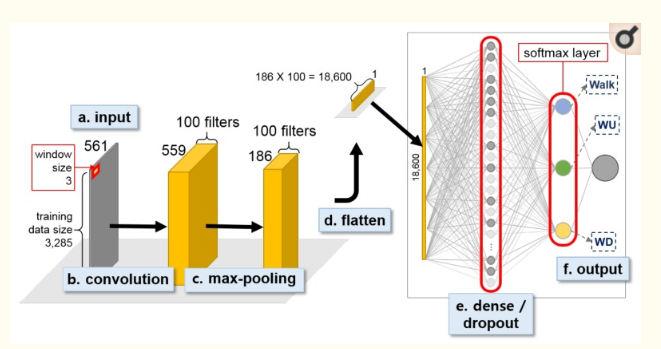

In [0]:
from IPython.display import display, Image
display(Image(filename='pic3.PNG'))


In [0]:
# Fit 1d CNN for dynamic HAR
from keras.layers import MaxPooling1D
seed(2017)
model = Sequential()
model.add(Conv1D(100, 3, input_shape=(561, 1), activation='relu'))
model.add(MaxPooling1D(3))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.add(Dropout(0.5))
adam = Adam(lr=0.0004, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='mean_squared_error', optimizer=adam, metrics=['accuracy'])
# Summarize layers
print(model.summary())


W0721 15:29:20.182632 139692053485440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 559, 100)          400       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 186, 100)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18600)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 55803     
_________________________________________________________________
dropout_2 (Dropout)          (None, 3)                 0         
Total params: 56,203
Trainable params: 56,203
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
new_dir = 'models/'
if not os.path.exists(new_dir):
    os.makedirs(new_dir)
fpath = new_dir + 'weights.{epoch:02d}-{val_acc:.2f}.hdf5'

callbk = ModelCheckpoint(fpath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto', period=1)

In [0]:
history = model.fit(np.expand_dims(x_train_dn, axis=2), y_train_dn_onehot,
          batch_size=32, epochs=100, verbose=2, validation_split=0.2, callbacks=[callbk])

Train on 2628 samples, validate on 657 samples
Epoch 1/100
 - 3s - loss: 0.2867 - acc: 0.4661 - val_loss: 0.1298 - val_acc: 0.8113

Epoch 00001: val_loss improved from inf to 0.12985, saving model to models/weights.01-0.81.hdf5
Epoch 2/100
 - 3s - loss: 0.2427 - acc: 0.5419 - val_loss: 0.1052 - val_acc: 0.8828

Epoch 00002: val_loss improved from 0.12985 to 0.10516, saving model to models/weights.02-0.88.hdf5
Epoch 3/100
 - 2s - loss: 0.2390 - acc: 0.5449 - val_loss: 0.0832 - val_acc: 0.9041

Epoch 00003: val_loss improved from 0.10516 to 0.08317, saving model to models/weights.03-0.90.hdf5
Epoch 4/100
 - 2s - loss: 0.2401 - acc: 0.5403 - val_loss: 0.0896 - val_acc: 0.9269

Epoch 00004: val_loss did not improve from 0.08317
Epoch 5/100
 - 3s - loss: 0.2393 - acc: 0.5331 - val_loss: 0.1125 - val_acc: 0.8782

Epoch 00005: val_loss did not improve from 0.08317
Epoch 6/100
 - 3s - loss: 0.2336 - acc: 0.5540 - val_loss: 0.0809 - val_acc: 0.9619

Epoch 00006: val_loss improved from 0.08317 t

Train_Accuracy 0.9954337899543378


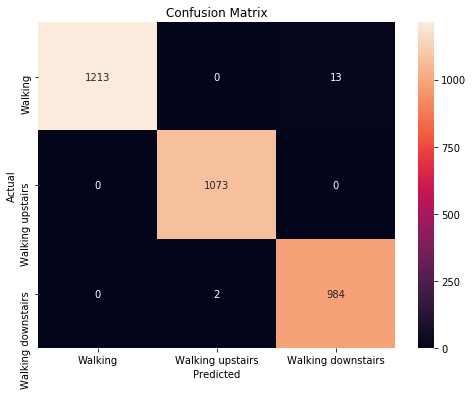

Test_Accuracy 0.9639509733237203


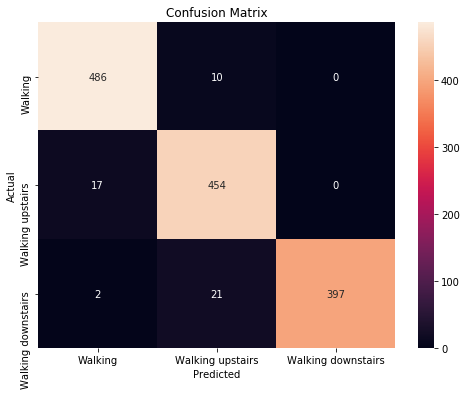

In [0]:
pred_ = model.predict(np.expand_dims(x_train_dn, axis=2), batch_size=32)
print("Train_Accuracy",accuracy_score(y_train_dn, np.argmax(pred_, axis=1)))
conf_matrix = confusion_matrix(y_train_dn ,np.argmax(pred_, axis=1))
class_label = ['Walking','Walking upstairs','Walking downstairs']

conf_matrix = pd.DataFrame(conf_matrix, index=class_label, columns=class_label)
fig = plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
#################
pred_ = model.predict(np.expand_dims(x_test_dn, axis=2), batch_size=32)
print("Test_Accuracy",accuracy_score(y_test_dn, np.argmax(pred_, axis=1)))
conf_matrix = confusion_matrix(y_test_dn ,np.argmax(pred_, axis=1))
class_label = ['Walking','Walking upstairs','Walking downstairs']
df_conf_matrix = pd.DataFrame(conf_matrix, index=class_label, columns=class_label)
fig = plt.figure(figsize=(8,6))
sns.heatmap(df_conf_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [0]:
#y_tr = y_train.copy()
#y_te = y_test.copy()

#np.place(y_tr , y_tr<4, [1])
#np.place(y_tr, y_tr>3, [0])
#np.place(y_te , y_te<4, [1])
#np.place(y_te, y_te>3, [0])




# Conclusion


**We have divided the problem to 2 phases**

*   Static
*   Dynamic

   
 **Static containes 3 activities**
 
*   Standing
*   Sitting
*   Laying

 
 
 **Dynamic contains 3 activities**

*   Walking
*   Walking Upstairs
*   Walking Downstairs


First we have to do a simple binary classification for which we can use a decision tree or simple nueral network.Then we have to do second phase of classification using CNN as above.

**We got accuracy of above 96% for both static and dynamic phases**


In [19]:
from prettytable import PrettyTable
x=PrettyTable()
x.field_names=['Model','Data','Train accuracy','Test accuracy']
x.add_row(['CNN','Static',99.75,96.28])
x.add_row(['CNN','Dynamic',99.54,96.39])
print(x)

+-------+---------+----------------+---------------+
| Model |   Data  | Train accuracy | Test accuracy |
+-------+---------+----------------+---------------+
|  CNN  |  Static |     99.75      |     96.28     |
|  CNN  | Dynamic |     99.54      |     96.39     |
+-------+---------+----------------+---------------+


## Referances



*   https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5949027/
*   https://github.com/heeryoncho/sensors2018cnnhar/tree/master/har


